# Data 550 Project 2
### Names: Connor Fairbanks, Graham Kerford

### Description of the Data

The 'basketball players stats per season-49 leagues' dataset was used for this project. It comprises player data for 49 leagues from 1999 to present. The dataset was downlaoded from [kaggle](https://www.kaggle.com/mirichoi0218/insurance/home) in January, 2020a dn is available at: [https://www.kaggle.com/jacobbaruch/basketball-players-stats-per-season-49-leagues](https://www.kaggle.com/jacobbaruch/basketball-players-stats-per-season-49-leagues). In total ~11 thousand players data was collected in 49 leagues for each season. Due to the large amount of data available the dataset used for this project was limited to the first 200 players in the NBA doing the regular season. The age of the players was added  to aid in the analysis. The dataset contains the following characteristics for each player:

- `League`: The league that the players played in for the specified season, limited to the NBA for this season.

- `Season`: Date of the NBA season.

- `Stage`: The period in the season doing which the data was taken.

- `Player`: The name of the player.

- `Team`: The team the player played for doing the season.

- `GP`: Games played doing the season. 

- `MIN`: Minutes played.

- `FGM`: Field goals made.

- `FGA`: Field goals against.

- `3PM`: 3 pointers made.

- `3PA`: 3 pointers against.

- `FTM`: Free throws made.

- `FTA`: Free throws against.

- `TOV`: Turnovers

- `PF`: Personal fouls

- `ORB`: Offensive rebounds

- `DRB`: Defensive rebounds

- `REB`: Total rebounds

- `AST`: Assists

- `STL`: Steals

- `BLK`: Blocks

- `PTS`: Points

- `Birth_year`: Year of birth

- `Birth_month`: Month of birth

- `Birth_date`: Birthdate

- `height`:

- `height`: (cm)

- `weight`: Weight in pounds

- `weight_kg`: Weight in kilograms

- `nationality`: Nationality of the player at birth

- `high_school`: High school attended

- `draft_round`: Draft hound

- `draft_pick`: Draft pick

- `draft_team`: Team drafted to

In [1]:
library(dplyr) 
library(ggplot2)
library(tibble)
library(tidyverse)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 4.0.3"
Warning message:
"package 'tidyverse' was built under R version 4.0.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
v purrr   0.3.4     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
basketball_df <- read.csv('players_stats_by_season_full_details.csv')

In [3]:
names(basketball_df)[1] <- 'League'
NBA_data_filtered <- filter(basketball_df, Stage == 'Regular_Season' & League == 'NBA' & 'GP' > 60)

In [14]:
age <- list()
for(i in 1:nrow(NBA_data_filtered)){
    current_year <- as.numeric(substring(NBA_data_filtered[i,2], 8,11))
    age[i] <- current_year - NBA_data_filtered$birth_year[i] 
}

NBA_data <-add_column(NBA_data_filtered,age = as.numeric(age),.after=22)
head(NBA_data)

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,X3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,...,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>
1,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163,956,1665,0,...,06-Mar-72,01-Jul,216,325,147,United States,Robert G. Cole High School,1,1,Orlando Magic
2,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126,788,1696,95,...,26-Jan-77,06-Jun,198,220,100,United States,Mainland High School,1,5,Golden State Warriors
3,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947,752,1476,2,...,24-Jul-63,09-Jun,206,265,120,United States,Summerfield High School,1,13,Utah Jazz
4,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853,729,1733,89,...,07-Jun-75,6-0,183,165,75,United States,Bethel High School,1,1,Philadelphia Sixers
5,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425,747,1666,177,...,23-Jul-68,04-Jun,193,180,82,United States,Skyline High School,1,2,Seattle SuperSonics
6,NBA,1999 - 2000,Regular_Season,Jerry Stackhouse,DET,82,3148,619,1447,83,...,05-Nov-74,06-Jun,198,218,99,United States,Oak Hill Academy,1,3,Philadelphia Sixers


In [19]:
NBA_grouped_age <- add_column(subset(NBA_data,select=c(GP:age)), subset(NBA_data,select=c(height_cm,weight_kg))) %>% group_by(age) %>% summarize(across(everything(), mean)) %>% mutate_at(vars(-age), funs(round(., 1)))
NBA_grouped_age

`summarise()` ungrouping output (override with `.groups` argument)



age,GP,MIN,FGM,FGA,X3PM,X3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,height_cm,weight_kg
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20,72.0,1754.9,268.0,612.4,48.2,145.7,131.8,182.7,110.3,154.4,83.8,222.8,306.7,125.5,49.1,45.8,716.1,203.6,101.6
21,74.0,1878.3,297.5,656.6,47.2,139.8,149.0,204.9,119.6,169.8,98.2,249.9,348.1,156.2,61.4,47.2,791.2,202.5,101.3
22,72.7,1851.7,302.4,657.8,48.0,139.3,150.4,202.9,114.9,166.3,95.4,247.6,342.9,160.2,59.0,43.4,803.3,201.9,101.3
23,73.4,1932.2,317.6,691.9,51.5,148.5,159.3,213.4,119.6,166.9,95.7,259.2,354.9,181.0,64.0,41.7,846.0,201.0,100.5
24,73.9,1925.3,316.6,686.1,54.8,154.6,156.7,208.7,114.4,166.6,92.8,250.9,343.7,174.3,63.3,40.5,844.7,201.1,101.2
25,73.3,1966.4,325.8,706.5,59.6,166.4,164.1,215.9,115.0,166.5,94.5,258.7,353.2,175.4,63.4,41.3,875.3,201.1,101.0
26,73.3,1980.5,326.1,707.9,61.4,169.6,168.3,219.2,114.9,164.8,94.5,263.6,358.1,180.8,64.1,40.6,882.1,200.7,101.1
27,72.8,1987.1,325.2,706.7,63.0,172.5,160.5,208.2,113.1,164.1,90.6,259.8,350.4,184.2,63.2,40.3,873.8,200.8,100.8
28,73.9,2024.6,334.4,728.1,65.2,179.2,168.5,218.5,117.1,166.3,90.2,262.2,352.4,193.9,63.2,40.4,902.5,200.7,101.0


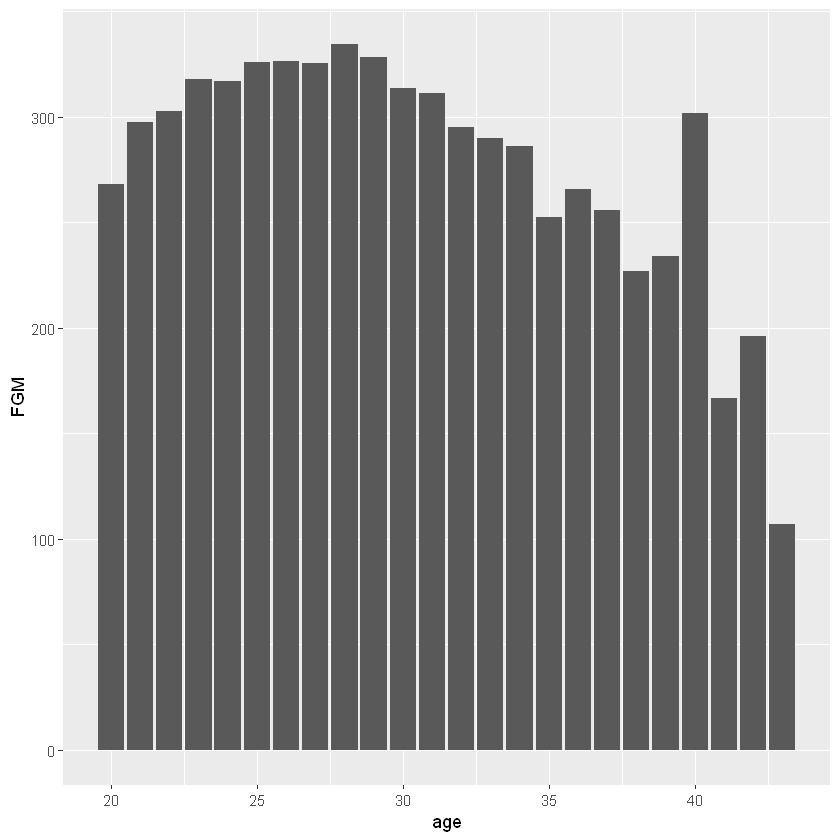

In [7]:
ggplot(NBA_grouped_age) + aes(x = age, y = FGM) + geom_col()

In [16]:
names(select_if(NBA_data))

ERROR: Error in is_logical(.predicate): argument ".predicate" is missing, with no default


ERROR while rich displaying an object: Error: At least one layer must contain all faceting variables: `GP`.
* Plot is missing `GP`
* Layer 1 is missing `GP`

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. 

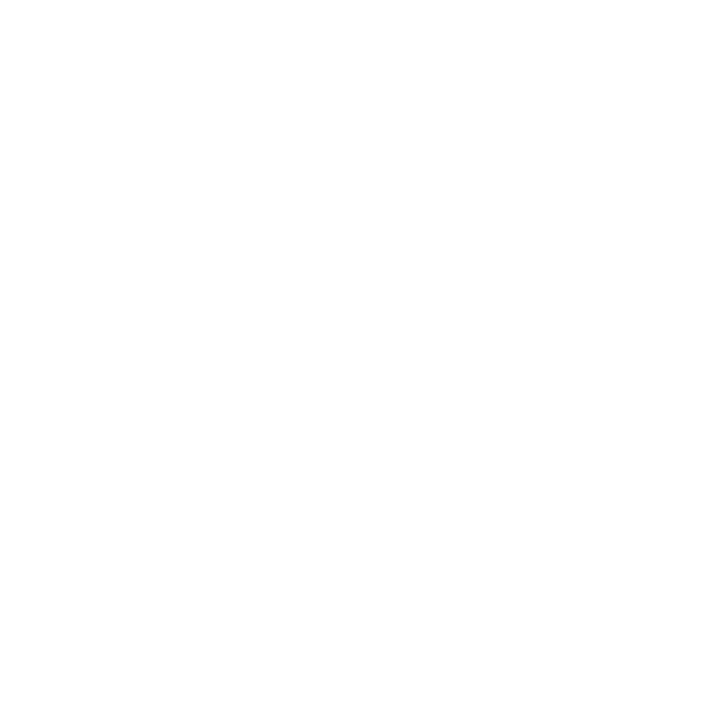

In [20]:
NBA_data %>%
    select_if(is.numeric) %>%
    pivot_longer(everything()) %>%
    ggplot(aes(x = height)) +
    geom_density(alpha=0.5, fill="dark orange") +
    facet_wrap(~GP, scales = 'free')
#)

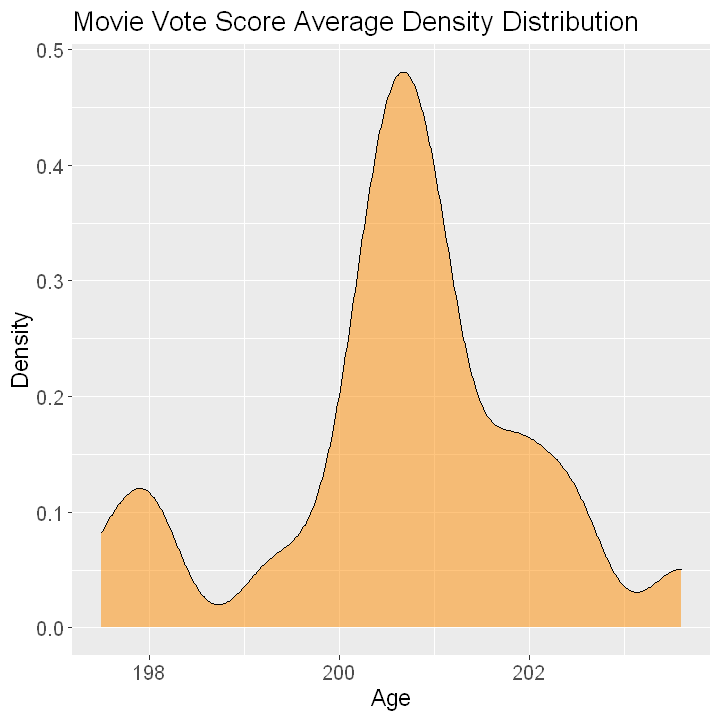

In [22]:
options(repr.plot.width=6, repr.plot.height=6)
ggplot(NBA_grouped_age) + 
    aes(x = height_cm) + 
    geom_density(alpha=0.5, fill="dark orange") +
    labs(x= "Age", y="Density", title= "Movie Vote Score Average Density Distribution") +
    theme(plot.title= element_text(size=16), axis.title= element_text(size=14), axis.text= element_text(size=12))

In [11]:
install.packages('GGally')

Installing package into 'C:/Users/Graha/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependency 'reshape'




package 'reshape' successfully unpacked and MD5 sums checked
package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Graha\AppData\Local\Temp\Rtmpqmnvty\downloaded_packages
